In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [26]:
ticker = "AAPL"   # you can change
df = yf.download(ticker, period="3y")

df = df[['Close']].dropna()
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_7336\274579497.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="3y")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2022-12-12,142.342560
2022-12-13,143.307999
2022-12-14,141.081619
2022-12-15,134.471344
2022-12-16,132.510864


In [27]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Close']])

df['Scaled_Close'] = scaled


In [28]:
df['Target'] = df['Scaled_Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Scaled_Close']]      # input = today's price
y = df['Target']              # output = next day's price

In [29]:
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [30]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [32]:
pred_test = model.predict(X_test)

mae = mean_absolute_error(y_test, pred_test)

# FIX FOR OLD SCIKIT-LEARN
mse = mean_squared_error(y_test, pred_test)
rmse = mse ** 0.5

print("MAE:", mae)
print("RMSE:", rmse)



MAE: 0.04169817558478609
RMSE: 0.06022609603713908


In [33]:
actual = scaler.inverse_transform(y_test.values.reshape(-1,1))
predicted = scaler.inverse_transform(pred_test.reshape(-1,1))

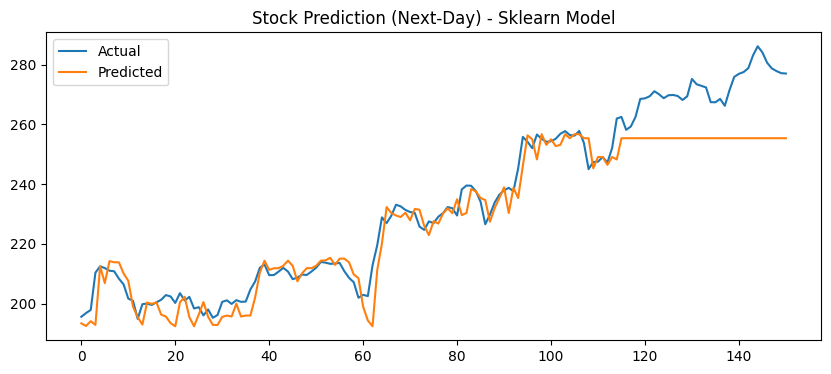

In [34]:
plt.figure(figsize=(10,4))
plt.plot(actual, label="Actual")
plt.plot(predicted, label="Predicted")
plt.legend()
plt.title("Stock Prediction (Next-Day) - Sklearn Model")
plt.show()

In [37]:
print("Scaler expects:", scaler.n_features_in_, "features")


Scaler expects: 1 features


In [40]:
last_close = df['Close'].iloc[-1]
                
				# Build correct shape for scaler (1 feature → shape must be (1,1))
				# coerce to float to avoid object/string dtype issues
last_row = np.array([[float(last_close)]], dtype=float)
                
print("last_row shape:", last_row.shape, "dtype:", last_row.dtype)
                
				# Transform safely with a clear fallback and error message
try:
	last_scaled = scaler.transform(last_row)
	print("last_scaled:", last_scaled)
except Exception as e:
					print("Scaler transform failed:", e)
					# attempt to coerce and reshape then retry
					last_row2 = np.array(last_row, dtype=float).reshape(1, -1)
					last_scaled = scaler.transform(last_row2)
					print("last_scaled after coercion:", last_scaled)




last_row shape: (1, 1) dtype: float64
last_scaled: [[0.94473338]]


C:\Users\user\AppData\Local\Temp\ipykernel_7336\1521898645.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_row = np.array([[float(last_close)]], dtype=float)


In [41]:
next_scaled = model.predict(last_scaled.reshape(-1,1))
next_price = scaler.inverse_transform(next_scaled.reshape(-1,1))[0][0]

print("Next day prediction:", next_price)


Next day prediction: 255.38971916198713


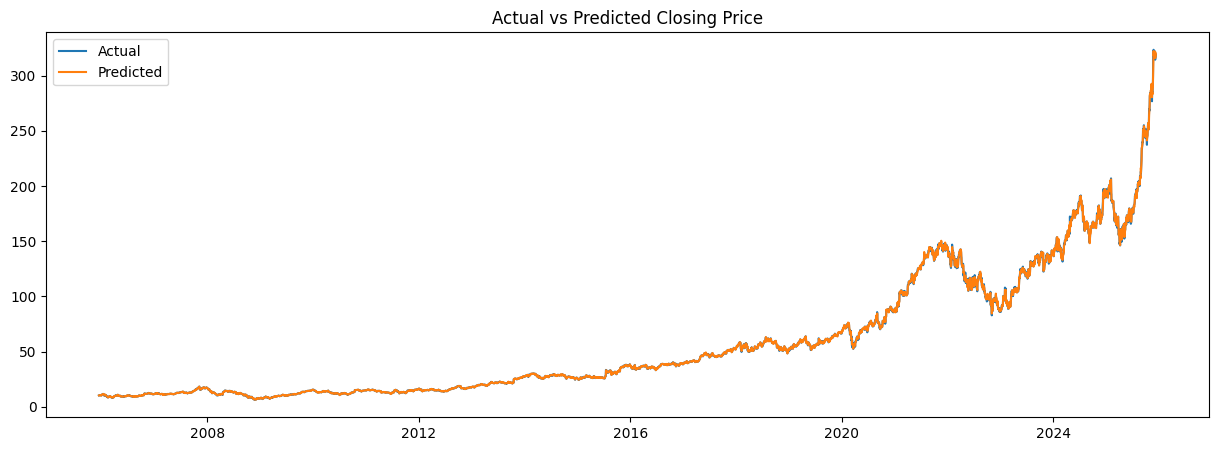

In [45]:
plt.figure(figsize=(15,5))
plt.plot(prediction_df['Actual'], label="Actual")
plt.plot(prediction_df['Predicted'], label="Predicted")
plt.title("Actual vs Predicted Closing Price")
plt.legend()
plt.show()


In [47]:
import joblib

joblib.dump(model, "stock_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!
